In [1]:
cd /content/drive/MyDrive/Git/ICT_Visual/Code

/content/drive/MyDrive/Git/ICT_Visual/Code


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [3]:
try :
    loaded_data = np.loadtxt('../Data/diabetes.csv',delimiter=',')
    
    x_data = loaded_data[:, 0:-1]
    t_data = loaded_data[:, [-1]]

    print(f'x_data.shape = {x_data.shape}')
    print(f't_data.shape = {t_data.shape}')

except Exception as err:

    print(str(err))

x_data.shape = (759, 8)
t_data.shape = (759, 1)


In [4]:
model = Sequential()

model.add(Dense(t_data.shape[1], input_shape=(x_data.shape[1],), activation='sigmoid'))

In [5]:
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [6]:
hist = model.fit(x_data, t_data, epochs=500, validation_split=0.2, verbose=2)

Epoch 1/500
19/19 - 2s - loss: 0.5981 - accuracy: 0.6689 - val_loss: 0.5874 - val_accuracy: 0.6776 - 2s/epoch - 83ms/step
Epoch 2/500
19/19 - 0s - loss: 0.5971 - accuracy: 0.6705 - val_loss: 0.5866 - val_accuracy: 0.6776 - 181ms/epoch - 10ms/step
Epoch 3/500
19/19 - 0s - loss: 0.5961 - accuracy: 0.6738 - val_loss: 0.5858 - val_accuracy: 0.6776 - 116ms/epoch - 6ms/step
Epoch 4/500
19/19 - 0s - loss: 0.5952 - accuracy: 0.6738 - val_loss: 0.5850 - val_accuracy: 0.6776 - 109ms/epoch - 6ms/step
Epoch 5/500
19/19 - 0s - loss: 0.5942 - accuracy: 0.6722 - val_loss: 0.5842 - val_accuracy: 0.6776 - 108ms/epoch - 6ms/step
Epoch 6/500
19/19 - 0s - loss: 0.5933 - accuracy: 0.6771 - val_loss: 0.5834 - val_accuracy: 0.6776 - 95ms/epoch - 5ms/step
Epoch 7/500
19/19 - 0s - loss: 0.5924 - accuracy: 0.6771 - val_loss: 0.5827 - val_accuracy: 0.6776 - 92ms/epoch - 5ms/step
Epoch 8/500
19/19 - 0s - loss: 0.5915 - accuracy: 0.6771 - val_loss: 0.5819 - val_accuracy: 0.6776 - 86ms/epoch - 5ms/step
Epoch 9/500


In [7]:
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.7655


[0.4827389121055603, 0.7654808759689331]

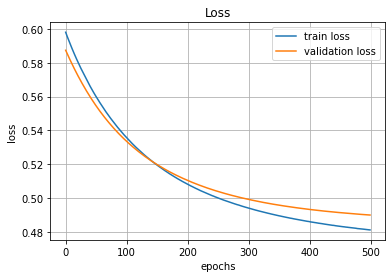

In [8]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

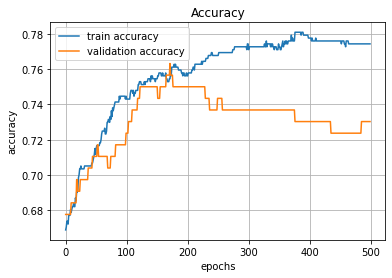

In [9]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()